# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | My wife and I are very disappo...
1,Not Verified | We flew BA between Heathrow an...
2,Not Verified | Absolutely disgusted with BA. ...
3,Not Verified | Took a trip to Nashville with m...
4,Not Verified | A nightmare journey courtesy o...


In [4]:
import os

# Create the 'data' directory if it doesn't exist
os.makedirs("data", exist_ok=True)

# Now save the file
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
df

,reviews
0,Not Verified | My wife and I are very disappo...
1,Not Verified | We flew BA between Heathrow an...
2,Not Verified | Absolutely disgusted with BA. ...
3,Not Verified | Took a trip to Nashville with m...
4,Not Verified | A nightmare journey courtesy o...
...,...
995,✅ Trip Verified | Frankfurt to London. BA sta...
996,❎ Not Verified | London to Olbia. Complete con...
997,✅ Trip Verified | Rotterdam to London City. A...
998,✅ Trip Verified | Return flight to Dublin. Ou...


In [6]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [7]:
df

,reviews
0,My wife and I are very disappointed with fly...
1,We flew BA between Heathrow and Berlin one w...
2,Absolutely disgusted with BA. Our flights we...
3,Took a trip to Nashville with my wife for a l...
4,A nightmare journey courtesy of British Airw...
...,...
995,Frankfurt to London. BA staff watched while ...
996,London to Olbia. Complete confusion. The plan...
997,Rotterdam to London City. After waiting for ...
998,Return flight to Dublin. Outbound Galleries ...


**Data Preprocessing Steps:**


*   Cleaning the text
*   Tokenization
*   POS Tagging
*   Stopwords removal
*   Obtaining the stem words





# **1. Cleaning the Text**

The provided code cleans the 'reviews' column by removing special characters and numbers, keeping only alphabetic characters. A new column, **Cleaned Reviews**, is created to store the processed text. This is useful for preparing text data for analysis or machine learning tasks.

In [8]:
import re

def clean(text):
    # Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()


,reviews,Cleaned Reviews
0,My wife and I are very disappointed with fly...,My wife and I are very disappointed with flyi...
1,We flew BA between Heathrow and Berlin one w...,We flew BA between Heathrow and Berlin one wa...
2,Absolutely disgusted with BA. Our flights we...,Absolutely disgusted with BA Our flights were...
3,Took a trip to Nashville with my wife for a l...,Took a trip to Nashville with my wife for a l...
4,A nightmare journey courtesy of British Airw...,A nightmare journey courtesy of British Airwa...


In [10]:
def clean(text):
    text = re.sub('[^A-Za-z]+', ' ', str(text)).lower()
    return text

df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,My wife and I are very disappointed with fly...,my wife and i are very disappointed with flyi...
1,We flew BA between Heathrow and Berlin one w...,we flew ba between heathrow and berlin one wa...
2,Absolutely disgusted with BA. Our flights we...,absolutely disgusted with ba our flights were...
3,Took a trip to Nashville with my wife for a l...,took a trip to nashville with my wife for a l...
4,A nightmare journey courtesy of British Airw...,a nightmare journey courtesy of british airwa...


# **2. Tokenization**

It performs tokenization by splitting the cleaned text into individual words. Tokenization helps break down the text into manageable units (tokens), which can be further analyzed or processed for tasks like NLP or sentiment analysis. Each review is split into tokens, typically words, allowing for more granular analysis of the text.

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
from nltk.tokenize import word_tokenize

def tokenize(text):
    return word_tokenize(text)

df['Tokenized Reviews'] = df['Cleaned Reviews'].apply(tokenize)
df.head()


,reviews,Cleaned Reviews,Tokenized Reviews
0,My wife and I are very disappointed with fly...,my wife and i are very disappointed with flyi...,"[my, wife, and, i, are, very, disappointed, wi..."
1,We flew BA between Heathrow and Berlin one w...,we flew ba between heathrow and berlin one wa...,"[we, flew, ba, between, heathrow, and, berlin,..."
2,Absolutely disgusted with BA. Our flights we...,absolutely disgusted with ba our flights were...,"[absolutely, disgusted, with, ba, our, flights..."
3,Took a trip to Nashville with my wife for a l...,took a trip to nashville with my wife for a l...,"[took, a, trip, to, nashville, with, my, wife,..."
4,A nightmare journey courtesy of British Airw...,a nightmare journey courtesy of british airwa...,"[a, nightmare, journey, courtesy, of, british,..."


# **3. POS tagging**
POS (Part of Speech) tagging involves assigning a part of speech to each word (token) in a sentence, such as noun, verb, adjective, etc. This helps in understanding the grammatical structure of the text and is useful for NLP tasks.

In [14]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [15]:
from nltk import pos_tag

def pos_tagging(tokens):
    return pos_tag(tokens)

df['POS Tagged Reviews'] = df['Tokenized Reviews'].apply(pos_tagging)
df.head()


,reviews,Cleaned Reviews,Tokenized Reviews,POS Tagged Reviews
0,My wife and I are very disappointed with fly...,my wife and i are very disappointed with flyi...,"[my, wife, and, i, are, very, disappointed, wi...","[(my, PRP$), (wife, NN), (and, CC), (i, NN), (..."
1,We flew BA between Heathrow and Berlin one w...,we flew ba between heathrow and berlin one wa...,"[we, flew, ba, between, heathrow, and, berlin,...","[(we, PRP), (flew, VBD), (ba, NN), (between, I..."
2,Absolutely disgusted with BA. Our flights we...,absolutely disgusted with ba our flights were...,"[absolutely, disgusted, with, ba, our, flights...","[(absolutely, RB), (disgusted, VBN), (with, IN..."
3,Took a trip to Nashville with my wife for a l...,took a trip to nashville with my wife for a l...,"[took, a, trip, to, nashville, with, my, wife,...","[(took, VBD), (a, DT), (trip, NN), (to, TO), (..."
4,A nightmare journey courtesy of British Airw...,a nightmare journey courtesy of british airwa...,"[a, nightmare, journey, courtesy, of, british,...","[(a, DT), (nightmare, JJ), (journey, NN), (cou..."


# **4. Stopwords removal**

Stopwords are common words like "the", "is", "in", etc., that are often removed from text data as they don't carry significant meaning. Removing these words helps in reducing noise and improving the focus on the more meaningful words in tasks like NLP.

In [16]:
from nltk.corpus import stopwords

def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word.lower() not in stop_words]

df['Without Stopwords'] = df['Tokenized Reviews'].apply(remove_stopwords)
df.head()


,reviews,Cleaned Reviews,Tokenized Reviews,POS Tagged Reviews,Without Stopwords
0,My wife and I are very disappointed with fly...,my wife and i are very disappointed with flyi...,"[my, wife, and, i, are, very, disappointed, wi...","[(my, PRP$), (wife, NN), (and, CC), (i, NN), (...","[wife, disappointed, flying, british, airways,..."
1,We flew BA between Heathrow and Berlin one w...,we flew ba between heathrow and berlin one wa...,"[we, flew, ba, between, heathrow, and, berlin,...","[(we, PRP), (flew, VBD), (ba, NN), (between, I...","[flew, ba, heathrow, berlin, one, way, connect..."
2,Absolutely disgusted with BA. Our flights we...,absolutely disgusted with ba our flights were...,"[absolutely, disgusted, with, ba, our, flights...","[(absolutely, RB), (disgusted, VBN), (with, IN...","[absolutely, disgusted, ba, flights, cancelled..."
3,Took a trip to Nashville with my wife for a l...,took a trip to nashville with my wife for a l...,"[took, a, trip, to, nashville, with, my, wife,...","[(took, VBD), (a, DT), (trip, NN), (to, TO), (...","[took, trip, nashville, wife, leisure, break, ..."
4,A nightmare journey courtesy of British Airw...,a nightmare journey courtesy of british airwa...,"[a, nightmare, journey, courtesy, of, british,...","[(a, DT), (nightmare, JJ), (journey, NN), (cou...","[nightmare, journey, courtesy, british, airway..."


# **5. Obtaining the Lemmatize Words**

 It utilizes the WordNetLemmatizer to convert words into their base forms, which provides more accurate text normalization compared to stemming. The lemmatized words are stored in a new DataFrame column for further analysis.

In [17]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

def lemmatize_words(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

df['Lemmatized Words'] = df['Without Stopwords'].apply(lemmatize_words)
df.head()

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatize_words(tokens):
    pos_tags = pos_tag(tokens)
    return [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tags]

df['Lemmatized Words'] = df['Without Stopwords'].apply(lemmatize_words)
df.head()


,reviews,Cleaned Reviews,Tokenized Reviews,POS Tagged Reviews,Without Stopwords,Lemmatized Words
0,My wife and I are very disappointed with fly...,my wife and i are very disappointed with flyi...,"[my, wife, and, i, are, very, disappointed, wi...","[(my, PRP$), (wife, NN), (and, CC), (i, NN), (...","[wife, disappointed, flying, british, airways,...","[wife, disappoint, fly, british, airway, fligh..."
1,We flew BA between Heathrow and Berlin one w...,we flew ba between heathrow and berlin one wa...,"[we, flew, ba, between, heathrow, and, berlin,...","[(we, PRP), (flew, VBD), (ba, NN), (between, I...","[flew, ba, heathrow, berlin, one, way, connect...","[flew, ba, heathrow, berlin, one, way, connect..."
2,Absolutely disgusted with BA. Our flights we...,absolutely disgusted with ba our flights were...,"[absolutely, disgusted, with, ba, our, flights...","[(absolutely, RB), (disgusted, VBN), (with, IN...","[absolutely, disgusted, ba, flights, cancelled...","[absolutely, disgust, ba, flight, cancel, may,..."
3,Took a trip to Nashville with my wife for a l...,took a trip to nashville with my wife for a l...,"[took, a, trip, to, nashville, with, my, wife,...","[(took, VBD), (a, DT), (trip, NN), (to, TO), (...","[took, trip, nashville, wife, leisure, break, ...","[take, trip, nashville, wife, leisure, break, ..."
4,A nightmare journey courtesy of British Airw...,a nightmare journey courtesy of british airwa...,"[a, nightmare, journey, courtesy, of, british,...","[(a, DT), (nightmare, JJ), (journey, NN), (cou...","[nightmare, journey, courtesy, british, airway...","[nightmare, journey, courtesy, british, airway..."


In [19]:
df[['reviews','Lemmatized Words']]

,reviews,Lemmatized Words
0,My wife and I are very disappointed with fly...,"[wife, disappoint, fly, british, airway, fligh..."
1,We flew BA between Heathrow and Berlin one w...,"[flew, ba, heathrow, berlin, one, way, connect..."
2,Absolutely disgusted with BA. Our flights we...,"[absolutely, disgust, ba, flight, cancel, may,..."
3,Took a trip to Nashville with my wife for a l...,"[take, trip, nashville, wife, leisure, break, ..."
4,A nightmare journey courtesy of British Airw...,"[nightmare, journey, courtesy, british, airway..."
...,...,...
995,Frankfurt to London. BA staff watched while ...,"[frankfurt, london, ba, staff, watch, security..."
996,London to Olbia. Complete confusion. The plan...,"[london, olbia, complete, confusion, plane, de..."
997,Rotterdam to London City. After waiting for ...,"[rotterdam, london, city, wait, hour, rotterda..."
998,Return flight to Dublin. Outbound Galleries ...,"[return, flight, dublin, outbound, gallery, no..."


# **Sentiment Analysis**

Sentiment analysis involves determining the sentiment expressed in a piece of text, often categorized as positive, negative, or neutral. You can use various libraries and models to achieve this.

 VADER  (Valence Aware Dictionary and Sentiment Reasoner) is a lexicon and rule-based sentiment analysis tool specifically designed for social media texts. It is well-suited for analyzing sentiments in tweets, reviews, and other informal text.

In [20]:
!pip install vaderSentiment

In [21]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemmatized Words'].apply(lambda x: ' '.join(x))  # Convert list of tokens to a single string
df['Sentiment'] = df['Sentiment'].apply(vadersentimentanalysis)

def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5:
        return 'Negative'
    else:
        return 'Neutral'

df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,Tokenized Reviews,POS Tagged Reviews,Without Stopwords,Lemmatized Words,Sentiment,Analysis
0,My wife and I are very disappointed with fly...,my wife and i are very disappointed with flyi...,"[my, wife, and, i, are, very, disappointed, wi...","[(my, PRP$), (wife, NN), (and, CC), (i, NN), (...","[wife, disappointed, flying, british, airways,...","[wife, disappoint, fly, british, airway, fligh...",-0.7717,Negative
1,We flew BA between Heathrow and Berlin one w...,we flew ba between heathrow and berlin one wa...,"[we, flew, ba, between, heathrow, and, berlin,...","[(we, PRP), (flew, VBD), (ba, NN), (between, I...","[flew, ba, heathrow, berlin, one, way, connect...","[flew, ba, heathrow, berlin, one, way, connect...",0.9875,Positive
2,Absolutely disgusted with BA. Our flights we...,absolutely disgusted with ba our flights were...,"[absolutely, disgusted, with, ba, our, flights...","[(absolutely, RB), (disgusted, VBN), (with, IN...","[absolutely, disgusted, ba, flights, cancelled...","[absolutely, disgust, ba, flight, cancel, may,...",-0.8479,Negative
3,Took a trip to Nashville with my wife for a l...,took a trip to nashville with my wife for a l...,"[took, a, trip, to, nashville, with, my, wife,...","[(took, VBD), (a, DT), (trip, NN), (to, TO), (...","[took, trip, nashville, wife, leisure, break, ...","[take, trip, nashville, wife, leisure, break, ...",0.8588,Positive
4,A nightmare journey courtesy of British Airw...,a nightmare journey courtesy of british airwa...,"[a, nightmare, journey, courtesy, of, british,...","[(a, DT), (nightmare, JJ), (journey, NN), (cou...","[nightmare, journey, courtesy, british, airway...","[nightmare, journey, courtesy, british, airway...",-0.6124,Negative


In [24]:
vader_counts = df['Analysis'].value_counts()
vader_counts

,count
Analysis,
Positive,553
Negative,409
Neutral,38


# **Visual Representation**

([<matplotlib.patches.Wedge at 0x792182c922c0>,
 [Text(-0.18230964410859873, 1.0847871651457701, 'Positive'),
  Text(0.05181694352545597, -1.0987788696383272, 'Negative'),
  Text(1.340391497969656, -0.16078131785335503, 'Neutral')],
 [Text(-0.09944162405923566, 0.5917020900795109, '55.3%'),
  Text(0.028263787377521433, -0.5993339288936329, '40.9%'),
  Text(0.8439502024253389, -0.10123268161137167, '3.8%')])

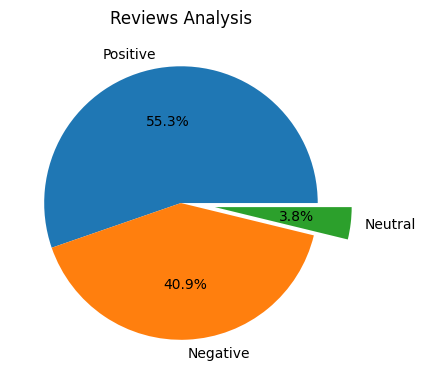

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

# **Distribution of Sentiment Scores**
 The histogram displays the frequency of different sentiment score ranges, helping you understand the overall spread and concentration of sentiment values.

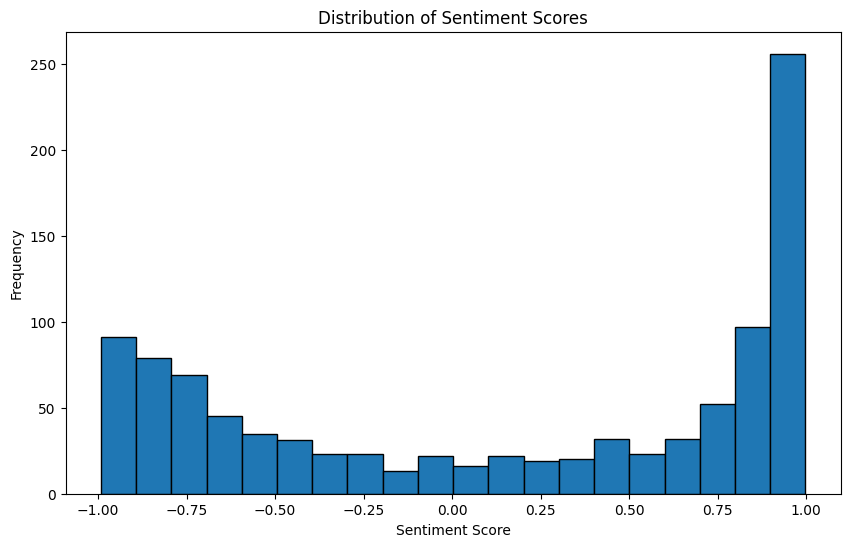

In [34]:
import matplotlib.pyplot as plt

# Get the sentiment scores
scores = df['Sentiment']

# Create a histogram of the sentiment scores
plt.figure(figsize=(10, 6))
plt.hist(scores, bins=20, color='#1f77b4', edgecolor='black')

# Add titles and labels
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

# Show the plot
plt.show()


# **Wordcloud**

The word cloud provides a visual representation of the most frequently occurring terms, with larger words indicating higher frequency. This visualization helps identify key themes and prominent words in the text data.








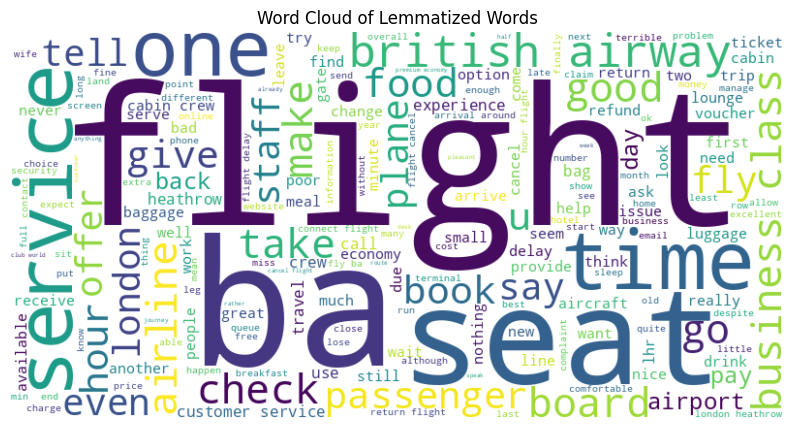

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all lemmatized words into a single string
text = ' '.join(df['Lemmatized Words'].apply(lambda x: ' '.join(x)))

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis
plt.title('Word Cloud of Lemmatized Words')
plt.show()
